In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="whitegrid")

# Загрузка и первичный анализ набора данных
Для обработки пропусков в числовых данных будем использовать набор данных о [медицинской страховке](https://www.kaggle.com/mirichoi0218/insurance).
<a id='data_desc'></a> 

<b>Задача регрессии</b> состоит в предсказании платы за медицинское обслуживание на основании других параметров.

Колонки:

1. `age` - возраст
2. `sex` -  пол
3. `bmi` - индекс массы тела
4. `children` - кол-во детей
5. `smoker` - курит/не курит
6. `region` - регион проживания в США
7. `charges` - плата за мед. обслуживание

In [136]:
data = pd.read_csv('../data/insurance.csv', sep = ',')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [137]:
# Размер набора данных (строки, колонки)
data.shape

(1338, 7)

In [138]:
# Типы данных в колонках
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Проверка на наличие пропущенных значений

In [139]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропущенные значения не найдены.

In [140]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Основные статистические показатели для каждого параметра

In [141]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Преобразуем категориальные признаки в числовые:

In [142]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#пол
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
#курение
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#регион
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [143]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Разделение выборки на тестовую и обучающую

Подключим необходимый метод из библиотек sklearn.

In [144]:
from sklearn.model_selection import train_test_split

Разделим выборку на входные и выходные данные:

In [145]:
X = data.drop(['charges'], axis = 1)
Y = data.charges
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    age  sex     bmi  children  smoker  region
0   19    0  27.900         0       1       3
1   18    1  33.770         1       0       2
2   28    1  33.000         3       0       2
3   33    1  22.705         0       0       1
4   32    1  28.880         0       0       1 

Выходные данные:

 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


Наконец, разделим выборку на обучающую и тестовую.

In [146]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0)

In [147]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       age  sex    bmi  children  smoker  region
1075   32    0  29.59         1       0       2
131    61    0  22.04         0       0       0
15     19    1  24.60         1       0       3
1223   20    0  24.42         0       1       2
1137   26    0  22.23         0       0       1 

Входные параметры тестовой выборки:

       age  sex     bmi  children  smoker  region
578    52    1  30.200         1       0       3
610    47    0  29.370         1       0       2
569    48    1  40.565         2       1       1
1034   61    1  38.380         0       0       1
198    51    0  18.050         0       0       1 

Выходные параметры обучающей выборки:

 1075     4562.84210
131     13616.35860
15       1837.23700
1223    26125.67477
1137     3176.28770
Name: charges, dtype: float64 

Выходные параметры тестовой выборки:

 578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: floa

Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.

In [148]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1003, 6)
(335, 6)
(1003,)
(335,)


# Линейная регрессия

### Оценим корреляцию между признаками

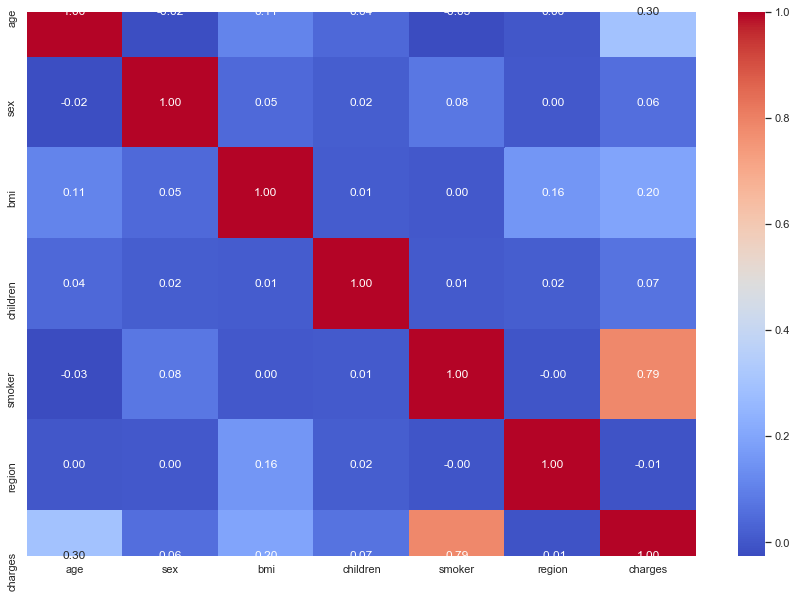

In [149]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.2f')

Наблюдается сильная корреляция между курением и целевым признаком. Также есть нембольшая корреляция между возрастом и целевым признаком.
Внутри нецелевых признаков корреляция практически не наблюдается. Значит, ничто не будет мешать построению качественной модели.

### Визуализация регрессии

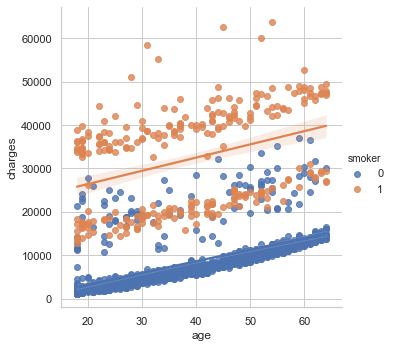

In [150]:
sns.lmplot(x='age',y='charges',hue='smoker',data=data)

С возрастом плата за мед. обсулживание увеличивается одинаково у курильщиков и не-курильщиков, однако плата за мед. обслуживание больше у курильщиков

### Построение линейной регрессии

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

In [152]:
print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',median_absolute_error(Y_test, lr_y_pred))
print('Коэффициент детерминации:',r2_score(Y_test, lr_y_pred))

Средняя абсолютная ошибка: 3998.2715408869753
Средняя квадратичная ошибка: 32073628.56010921
Median absolute error: 2390.4803984930822
Коэффициент детерминации: 0.7962732059725786


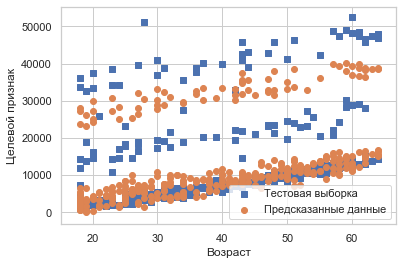

In [153]:
plt.scatter(X_test.age, Y_test, marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.age, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Возраст')
plt.ylabel('Целевой признак')
plt.show()

Обучение далеко не идеальное, но все равно достаточно неплохое.

### Полиномиальная регрессия

Уберем параметр `region`, т.к. мне кажется, что его возведение в квадрат категориального признака может оказать плохое влияние на обучение.

In [154]:
from sklearn.preprocessing import PolynomialFeatures

X = data.drop(['charges','region'], axis = 1)
Y = data.charges

poly = PolynomialFeatures (degree = 2)

X_quad = poly.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_quad, Y, random_state=0)

poly_Lin_Reg = LinearRegression().fit(X_train,Y_train)

poly_y_pred = poly_Lin_Reg.predict(X_test)

In [155]:
print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test, poly_y_pred))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test, poly_y_pred))
print('Median absolute error:',median_absolute_error(Y_test, poly_y_pred))
print('Коэффициент детерминации:',r2_score(Y_test, poly_y_pred))

Средняя абсолютная ошибка: 2761.13481435985
Средняя квадратичная ошибка: 18117605.544237126
Median absolute error: 1784.840904518394
Коэффициент детерминации: 0.8849197344147238


Показатели значительно улучшились. Коэффициент детерминации отличный. Хотя показатели ошибок все равно очень большие.

# Метод опорных векторов

## Полиномиальный регрессор

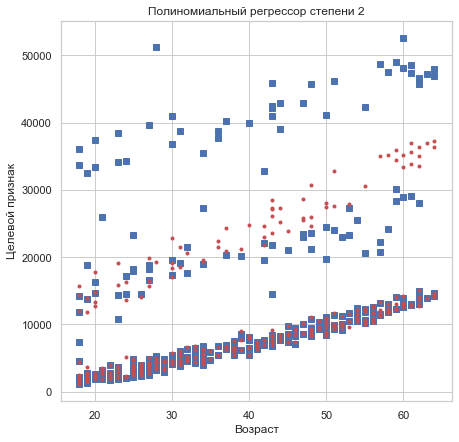

In [156]:
from sklearn.svm import SVR

X = data.drop(['charges'], axis = 1)
Y = data.charges
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

polySVR = SVR(kernel='poly', degree=2, gamma=0.2, C=1.0)
polySVR.fit(X_train, Y_train)
svr_y_pred = polySVR.predict(X_test)

fig, ax = plt.subplots(figsize=(7,7))
ax.set_title('Полиномиальный регрессор степени 2')
ax.plot(X_test.age, Y_test, 'bs')
ax.plot(X_test.age, svr_y_pred, 'r.')
ax.set_xlabel('Возраст')
ax.set_ylabel('Целевой признак')
plt.show()

In [157]:
print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test, svr_y_pred))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test, svr_y_pred))
print('Median absolute error:',median_absolute_error(Y_test, svr_y_pred))
print('Коэффициент детерминации:',r2_score(Y_test, svr_y_pred))

Средняя абсолютная ошибка: 3149.0234805327673
Средняя квадратичная ошибка: 46508573.89319307
Median absolute error: 152.70253406748088
Коэффициент детерминации: 0.7045846360572994


Видно, что благодаря полиномиальной регрессии на нижнем скоплении точек поведение предсказанных значений оказалось практически полностью идентичным, в отличие от поведения предсказанных значений на линейной регрессии.

Из-за особенностей распределения точек в выборке данных, а точнее из-за их "кучного" разброса, сложно построить точную модель предсказаний.

### Масштабирование

Попробуем масштабировать наш набор данных, чтобы сделать все признаки "равноценными".

In [158]:
from sklearn.preprocessing import MinMaxScaler

In [159]:
x_columns = ['age','sex','bmi','children','smoker','region']

# Масштабирование данных в диапазоне от 0 до 1
sc = MinMaxScaler()
sc_data = sc.fit_transform(data[x_columns])
sc_data[:2]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.66666667]])

In [160]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(
    sc_data, data['charges'], test_size=0.2, random_state=1)

X_train_2.shape, X_test_2.shape

((1070, 6), (268, 6))

In [161]:
SVR_2 = SVR(gamma = 'scale')
SVR_2.fit(X_train_2, Y_train_2)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [162]:
svr_y_pred_2 = SVR_2.predict(X_test_2)

print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test_2, svr_y_pred_2))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test_2, svr_y_pred_2))
print('Median absolute error:',median_absolute_error(Y_test_2, svr_y_pred_2))
print('Коэффициент детерминации:',r2_score(Y_test_2, svr_y_pred_2))

Средняя абсолютная ошибка: 8279.155456187918
Средняя квадратичная ошибка: 165503416.86280978
Median absolute error: 5043.8682995933195
Коэффициент детерминации: -0.1086730154360227


Показатели ухудшились. Причину назвать затрудняюсь.

Попробуем убрать `region`, чтобы не было признака с фиктивным "порядком" в данным, который может помешать обучению.

In [163]:
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(
    data.drop(['charges', 'region'],axis=1), test_data['charges'], test_size=0.2, random_state=1)

X_train_3.shape, X_test_3.shape

((1070, 5), (268, 5))

In [164]:
SVR_3 = SVR(gamma = 'scale')
SVR_3.fit(X_train_3, Y_train_3)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [165]:
svr_y_pred_3 = SVR_3.predict(X_test_3)

print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test_3, svr_y_pred_3))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test_3, svr_y_pred_3))
print('Median absolute error:',median_absolute_error(Y_test_3, svr_y_pred_3))
print('Коэффициент детерминации:',r2_score(Y_test_3, svr_y_pred_3))

Средняя абсолютная ошибка: 8279.77156398549
Средняя квадратичная ошибка: 166561198.51123333
Median absolute error: 4979.663903338313
Коэффициент детерминации: -0.11575887500351856


Ситуация не улучшилась.

# Дерево решений

In [176]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [0.04, 0.06, 0.08, 0.1],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}

In [177]:
%%time
grid_1 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                    param_grid=params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_1.fit(data.drop(['charges'], axis=1), data['charges'])

Wall time: 5.66 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=1,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08, 0.1]},
             pre_dispatch

In [178]:
%%time
grid_2 = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                    param_grid=params, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_2.fit(data.drop(['charges'], axis=1), data['charges'])

Wall time: 618 ms


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=1,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08, 0.1]},
             pre_dispatch

In [179]:
print('Лучший показатель средней абсолютной ошибки:',-grid_1.best_score_)
print('Параметры для данного показателя:\n',grid_1.best_params_)

Лучший показатель средней абсолютной ошибки: 2883.9902213751066
Параметры для данного показателя:
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04}


In [180]:
print('Лучший показатель средней квадратичной ошибки:',-grid_2.best_score_)
print('Параметры для данного показателя:\n',grid_2.best_params_)

Лучший показатель средней квадратичной ошибки: 23280508.96381089
Параметры для данного показателя:
 {'max_depth': 6, 'max_features': 0.8, 'min_samples_leaf': 0.04}


Дерево решение также дает плохие показатели оценок точности обучения. Возможно, для более точного обучения и получения лучшей регрессии требуется большее количество исходных данных